# Simulación modelos ARIMA 

Se desea simular un proceso $ARIMA(p=1,d=1,q=1)$ con $d=1$, al igual que proceso $ARIMA(p=1,d=1,q=1)$ con drift. Inicialmente vamos a simular el proceso
$$(1-B)(1-\phi B)X_{t}=(1+\theta B)Z_{t}$$

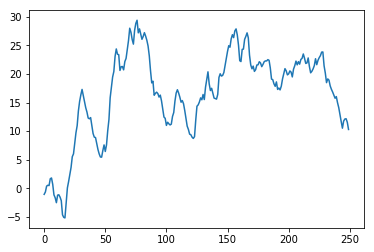

In [5]:
import numpy as np

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA



Tlength=250
a0=3
a1=-0.5
tiempo=np.arange(1, Tlength+1, 1)
xt=a1*tiempo
arparams = np.array([1.5, -0.5])
#maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y)

Ahora procederemos a simular una caminata aletoria un proceso que tiene caminata aletoria y drfit
$$(1-B)(1-\phi B)X_{t}+ a_{0}=(1+\theta B)Z_{t}$$

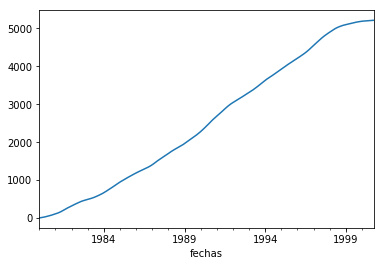

In [8]:
Tlength=250
a0=3
a1=-0.5
tiempo=np.arange(1, Tlength+1, 1)
xt=a1*tiempo
arparams = np.array([1.5, -0.5])
#maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
df = pd.DataFrame({'simul': y, 'fechas':pd.period_range('1980', periods=Tlength, freq='M')}) 
simulada=df.set_index('fechas')['simul']
simuladapa0=simulada+a0
drift=simuladapa0.cumsum()
drift.plot(x='fechas', y='simul')
